# Question 3

In [66]:
#importing libraries

In [48]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [51]:
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [61]:
from tensorflow.keras.datasets import fashion_mnist

In [72]:
import random
random.seed(42)

In [52]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#normalizing the data to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

#reshaping the data for the MLP model (flattening each 28x28 image to 784-dimensional vector)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (60000, 784), Test data shape: (10000, 784)


In [73]:
#building the MLP model
mlp_model = Sequential([
    Dense(30, activation='relu', input_shape=(784,)),  #first hidden layer with 30 neurons
    Dense(20, activation='relu'),                      #second hidden layer with 20 neurons
    Dense(10, activation='softmax')                    #output layer with 10 neurons (for 10 classes)
])

#compiling the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training the MLP model
mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

#evaluating on the test data
test_loss, test_acc = mlp_model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

c:\Users\jainm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7389 - loss: 0.8435 - val_accuracy: 0.9354 - val_loss: 0.2178
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9418 - loss: 0.2015 - val_accuracy: 0.9487 - val_loss: 0.1669
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9568 - loss: 0.1515 - val_accuracy: 0.9579 - val_loss: 0.1389
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9612 - loss: 0.1330 - val_accuracy: 0.9586 - val_loss: 0.1375
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9665 - loss: 0.1120 - val_accuracy: 0.9630 - val_loss: 0.1197
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9701 - loss: 0.1013 - val_accuracy: 0.9637 - val_loss: 0.1214
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9726 - loss: 0.0916 - val_accuracy: 0.9653 - val_loss: 0.1129
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9758 - loss: 0.0801 - val_accuracy: 0.

In [74]:
#training Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#training Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

#predictions
y_pred_mlp = mlp_model.predict(X_test).argmax(axis=1)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

#evaluation
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99    

Both MLP (Multi Layer Perceptron) and RF (Random Forest) show high accuracy of ~97% due to MLP's ability to learn non-linear patterns and ensemble approach of RF.<br>
LR (Logistic Regression) on the other hand showed lower accuracy of ~93% due to its linear nature.

Digits `3` and `5` were commonly confused, as shown by their relatively low recall in all methods. This was due to their similar shape, especially when written poorly.<br>
Digits `4` and `9` were also confused due to the loop at the top, making them look similar.<br>
Digit `5` itself had lowest recall in general, which is due to the fact it resembling to other digits easily by just an addition or deletion of a stroke.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


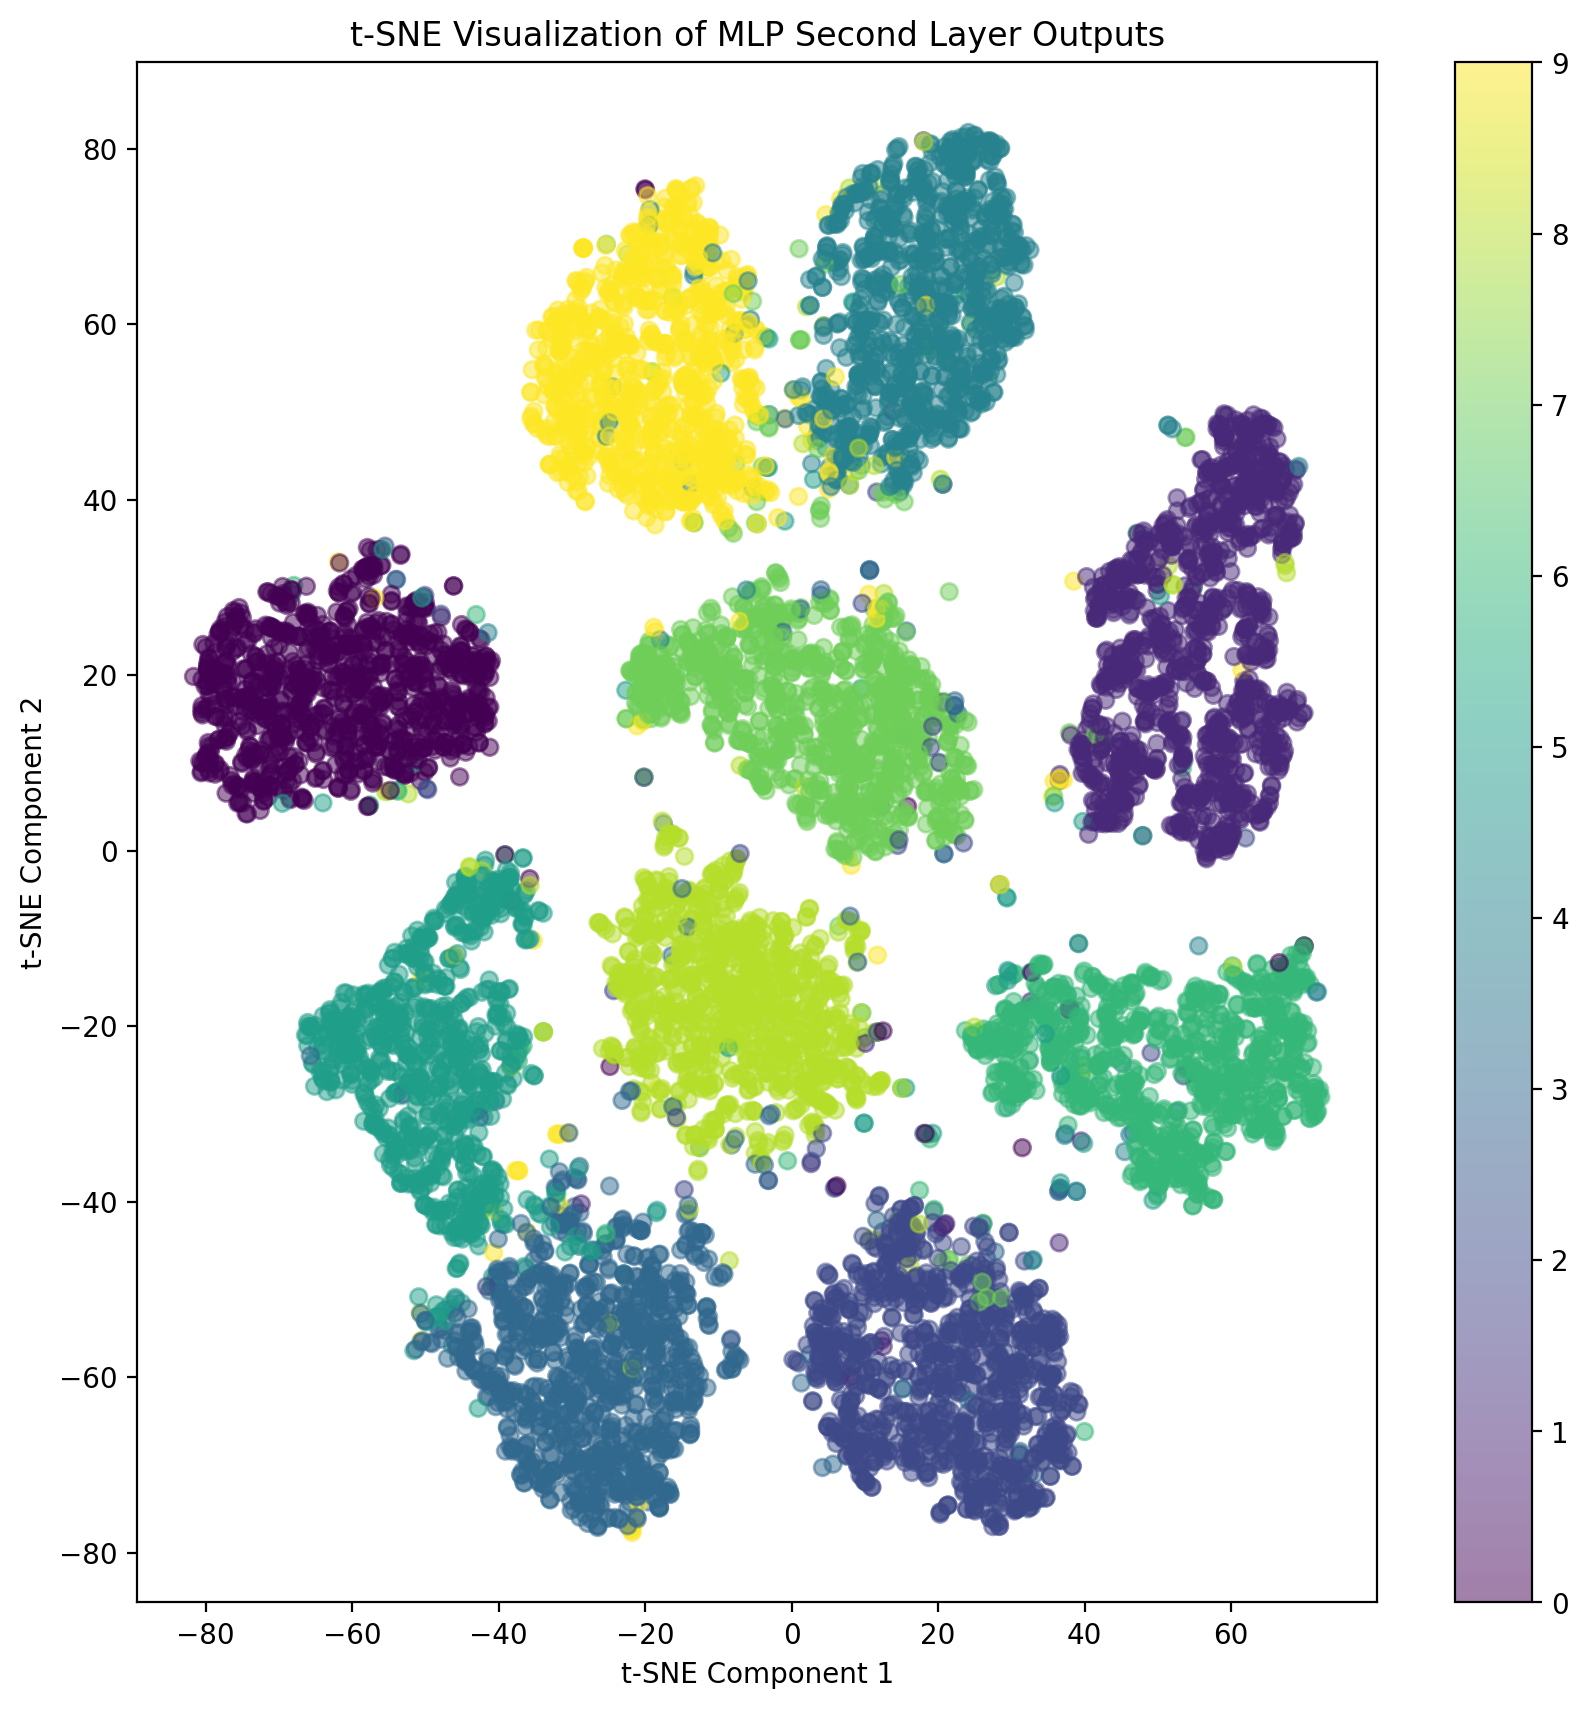

In [75]:
#creating a model to extract the output from the second hidden layer
intermediate_layer_model = Model(inputs=mlp_model.layers[0].input, outputs=mlp_model.layers[1].output)
layer_output = intermediate_layer_model.predict(X_test)

#applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_output = tsne.fit_transform(layer_output)

#plotting the t-SNE results
plt.figure(figsize=(10, 10))
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of MLP Second Layer Outputs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

  1/313 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step

c:\Users\jainm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


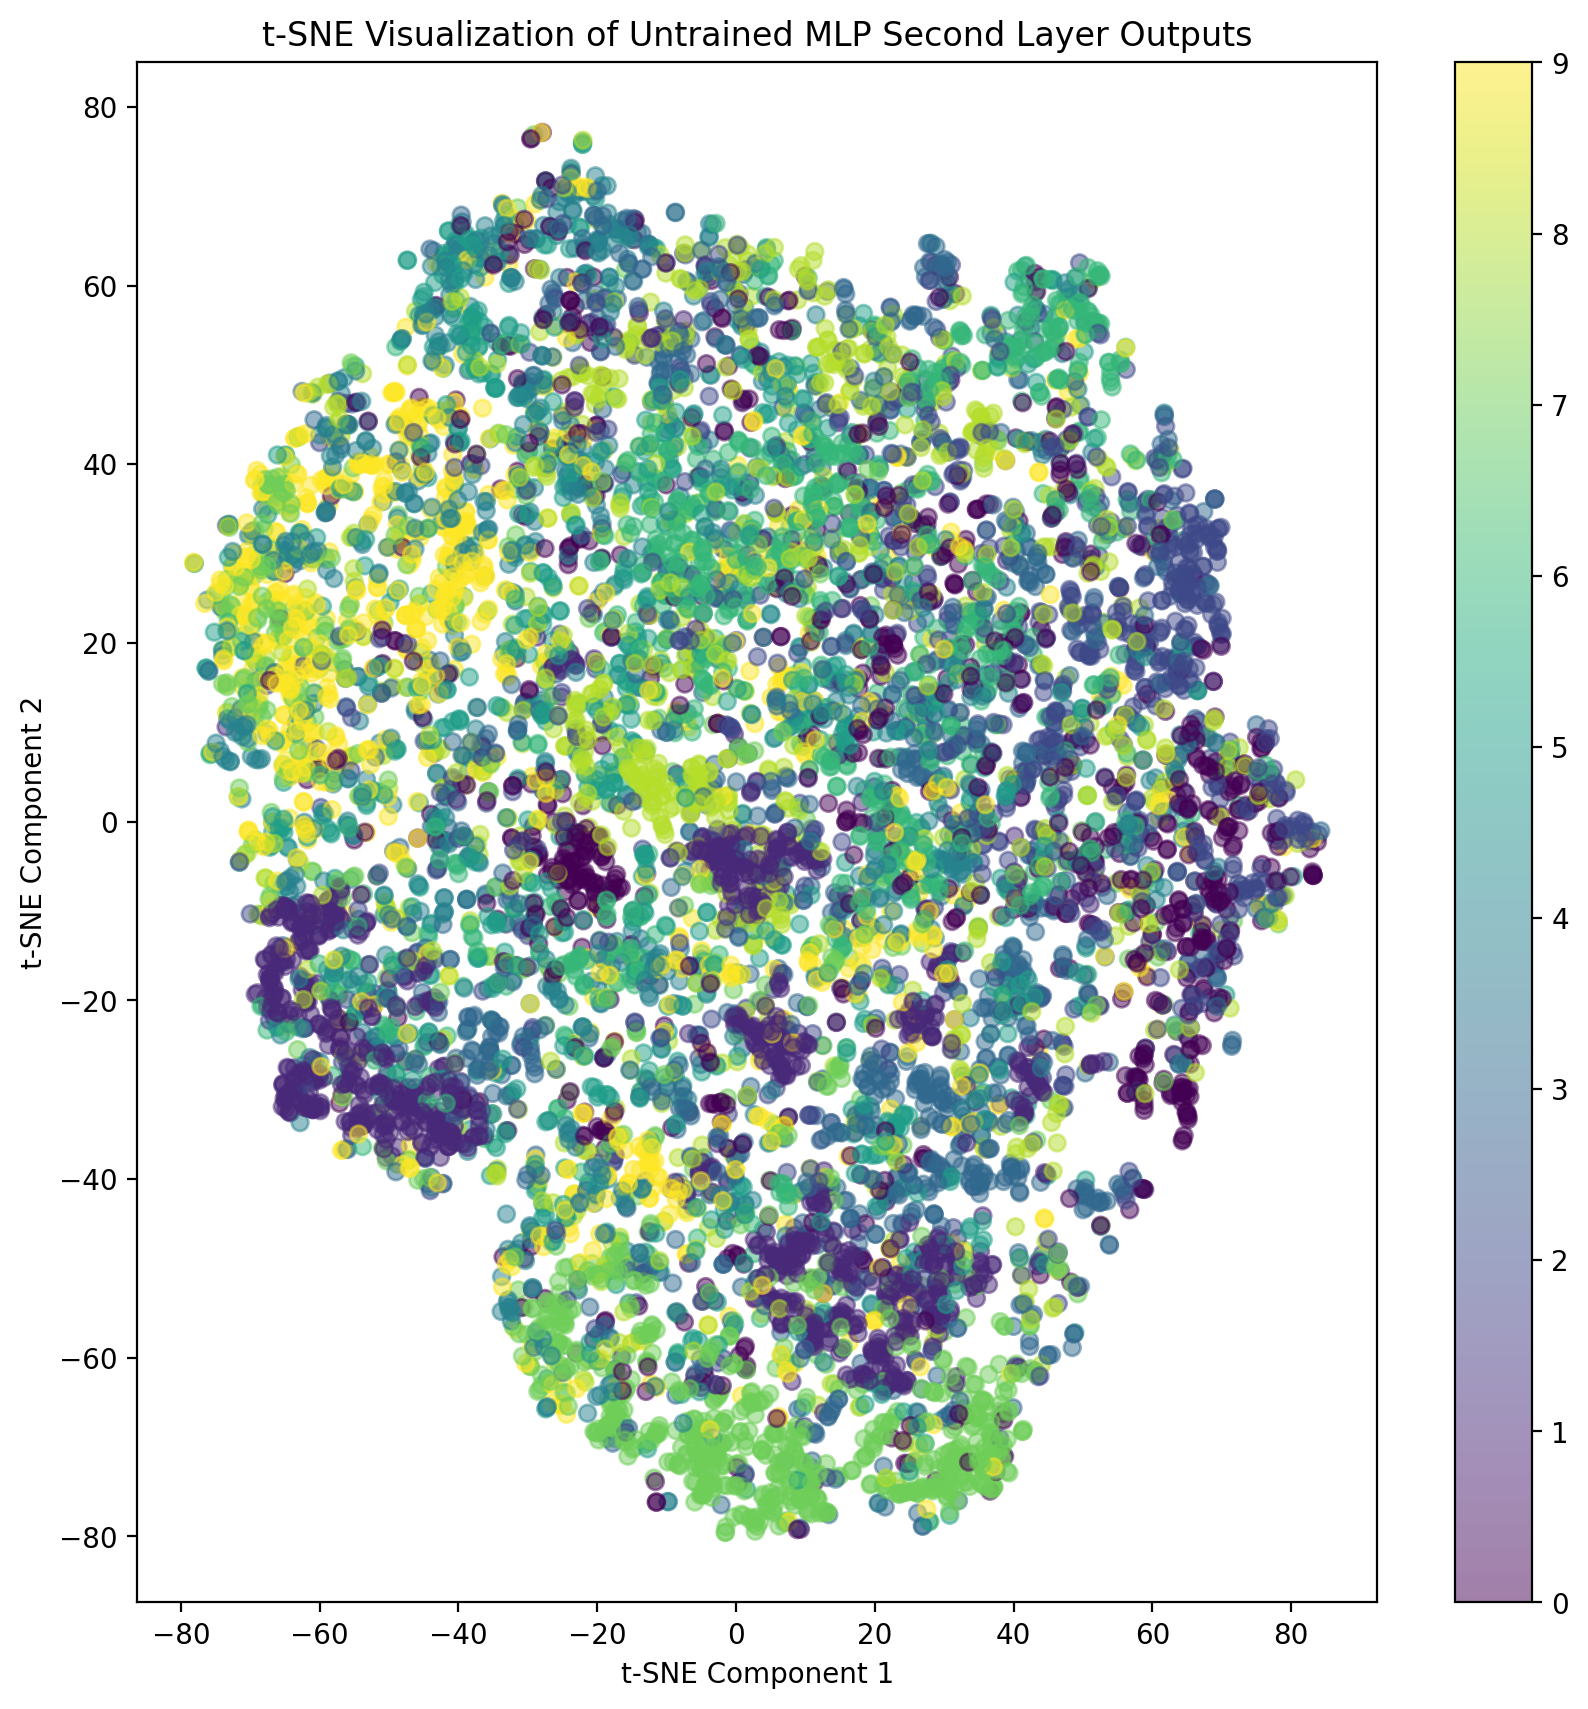

In [76]:
#building the untrained MLP model
untrained_mlp_model = Sequential([
    Dense(30, activation='relu', input_shape=(784,)),  #first hidden layer with 30 neurons
    Dense(20, activation='relu'),                      #second hidden layer with 20 neurons
    Dense(10, activation='softmax')                    #output layer with 10 neurons (for 10 classes)
])

#compiling the untrained model
untrained_mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#creating a model to extract the output from the second hidden layer
untrained_intermediate_layer_model = Model(inputs=untrained_mlp_model.layers[0].input, outputs=untrained_mlp_model.layers[1].output)
untrained_layer_output = untrained_intermediate_layer_model.predict(X_test)

#applying t-SNE for the untrained model
untrained_tsne = TSNE(n_components=2, random_state=42)
untrained_tsne_output = untrained_tsne.fit_transform(untrained_layer_output)

#plotting the t-SNE results for the untrained model
plt.figure(figsize=(10, 10))
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of Untrained MLP Second Layer Outputs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

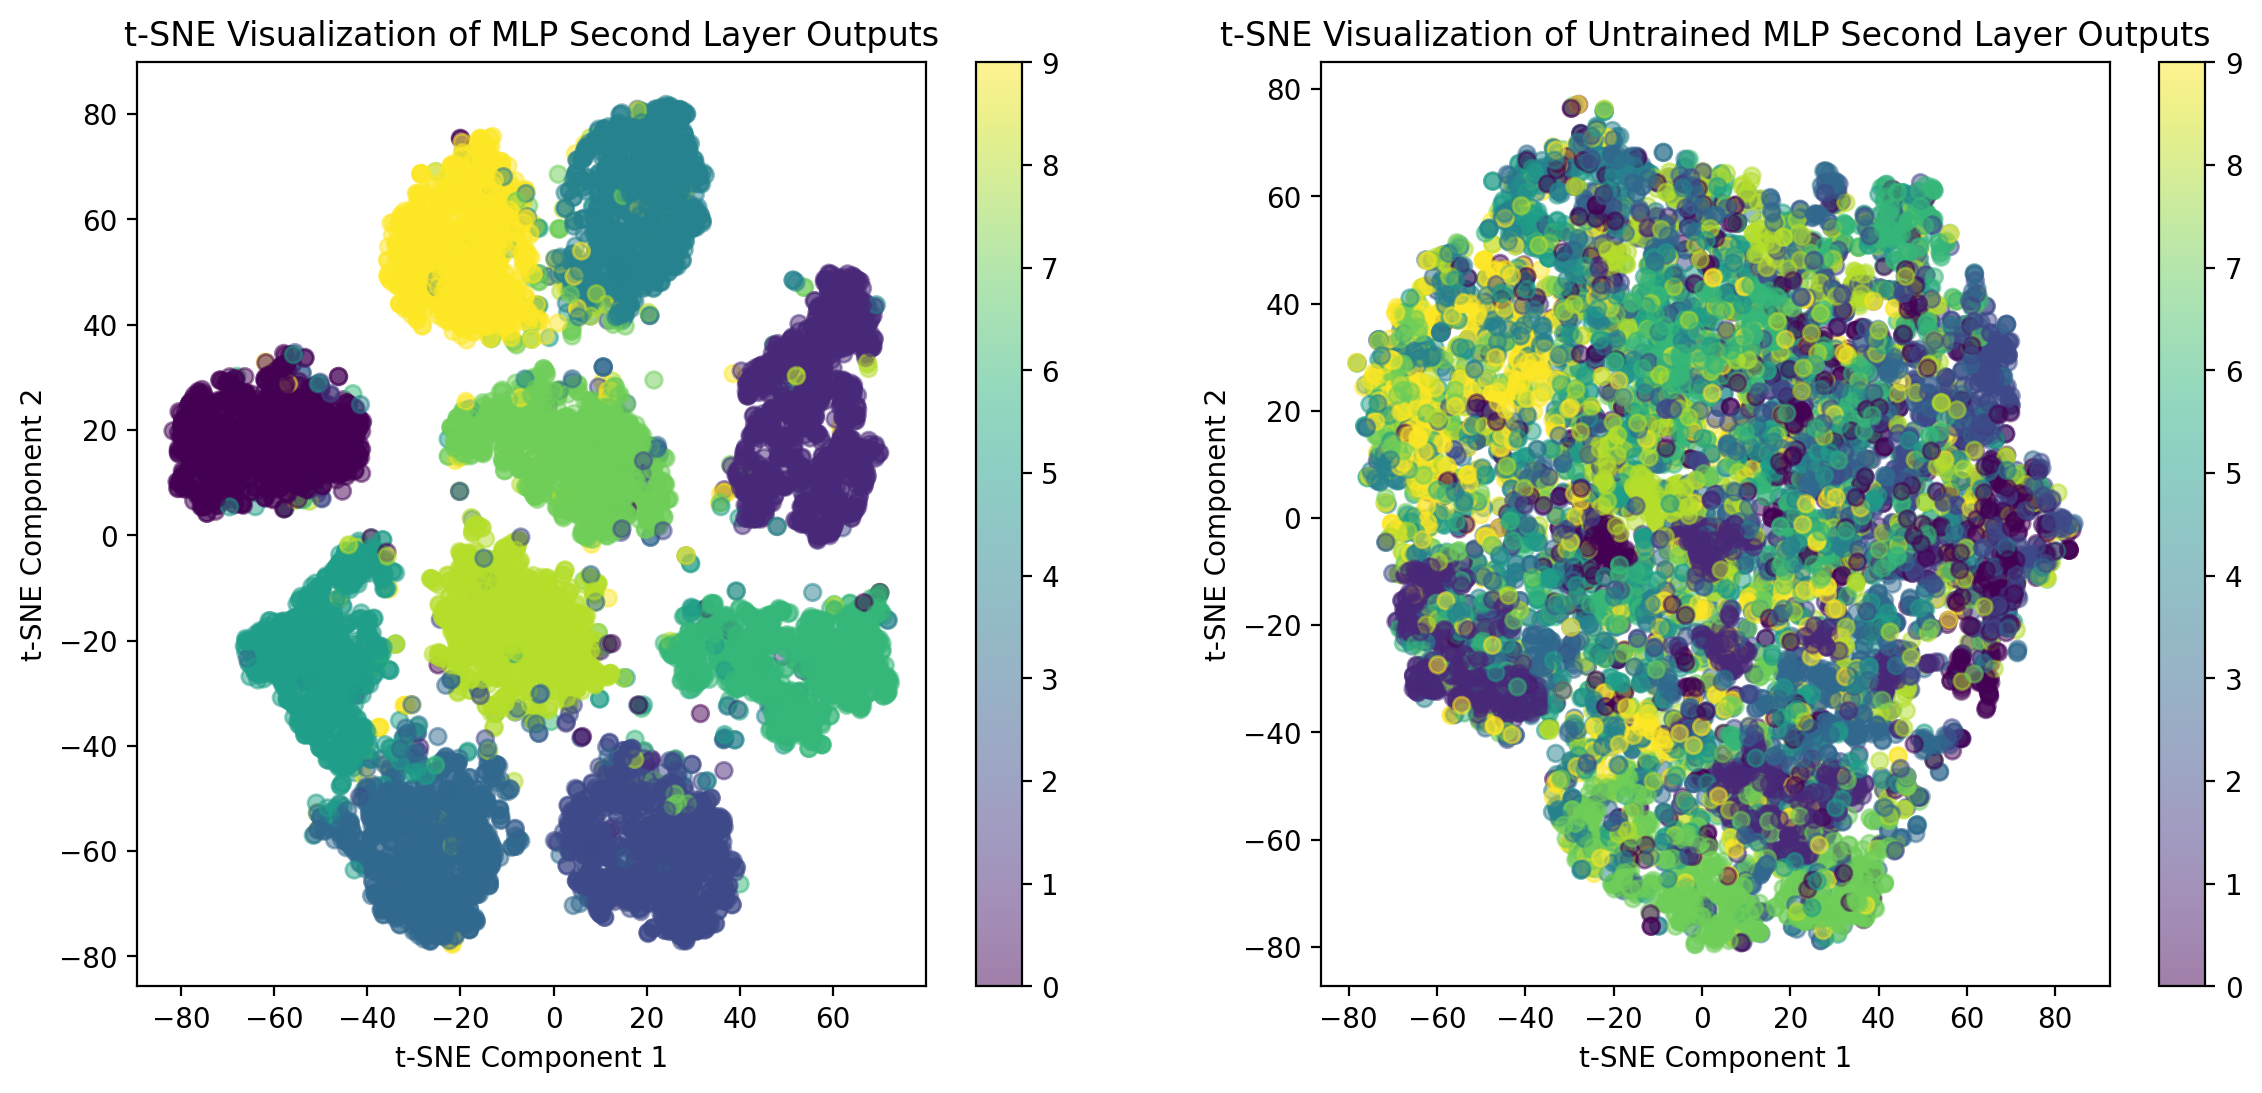

In [77]:
#plotting both trained and untrained t-SNE results for comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of MLP Second Layer Outputs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.subplot(1, 2, 2)
plt.scatter(untrained_tsne_output[:, 0], untrained_tsne_output[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of Untrained MLP Second Layer Outputs")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

As can be seen above, the t-SNE plot for the untrained model shows randomly scattered points, while the trained model t-SNE plot displays well-defined clusters, with each digit forming its own group or cluster. The randomness of the untrained model indicates that the intermediate layer has not learned any meaningful patterns to classify the data, and the weights are still initialized randomly, but the distinch clusters of the trained model shows relevant weights have been assigned to the intermediate layer nodes to observe patterns. Some overlapping is still visible, which represents that the trained model might not be perfect, but it still has learned something.<br>
We conclude from this that training the MLP helps the network learn meaningful embeddings that seperate different classes. The intermediate layer's output contains features that allow the model to cluster digits more effectively. This shows how the meaningless intial randomized embeddings of the untrained model improves its learning on feature presentations to form structured clusters.

In [78]:
#loading, normalizing and flattening the Fashion MNIST dataset
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()
X_fashion_test = X_fashion_test.reshape(-1, 784) / 255.0

In [79]:
y_fashion_pred = mlp_model.predict(X_fashion_test).argmax(axis=1)
print("Fashion-MNIST Classification Report:")
print(classification_report(y_fashion_test, y_fashion_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fashion-MNIST Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.01      0.00      1000
           3       0.18      0.97      0.31      1000
           4       0.15      0.00      0.00      1000
           5       0.02      0.02      0.02      1000
           6       0.16      0.01      0.02      1000
           7       0.00      0.00      0.00      1000
           8       0.31      0.04      0.07      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.08      0.11      0.04     10000
weighted avg       0.08      0.11      0.04     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


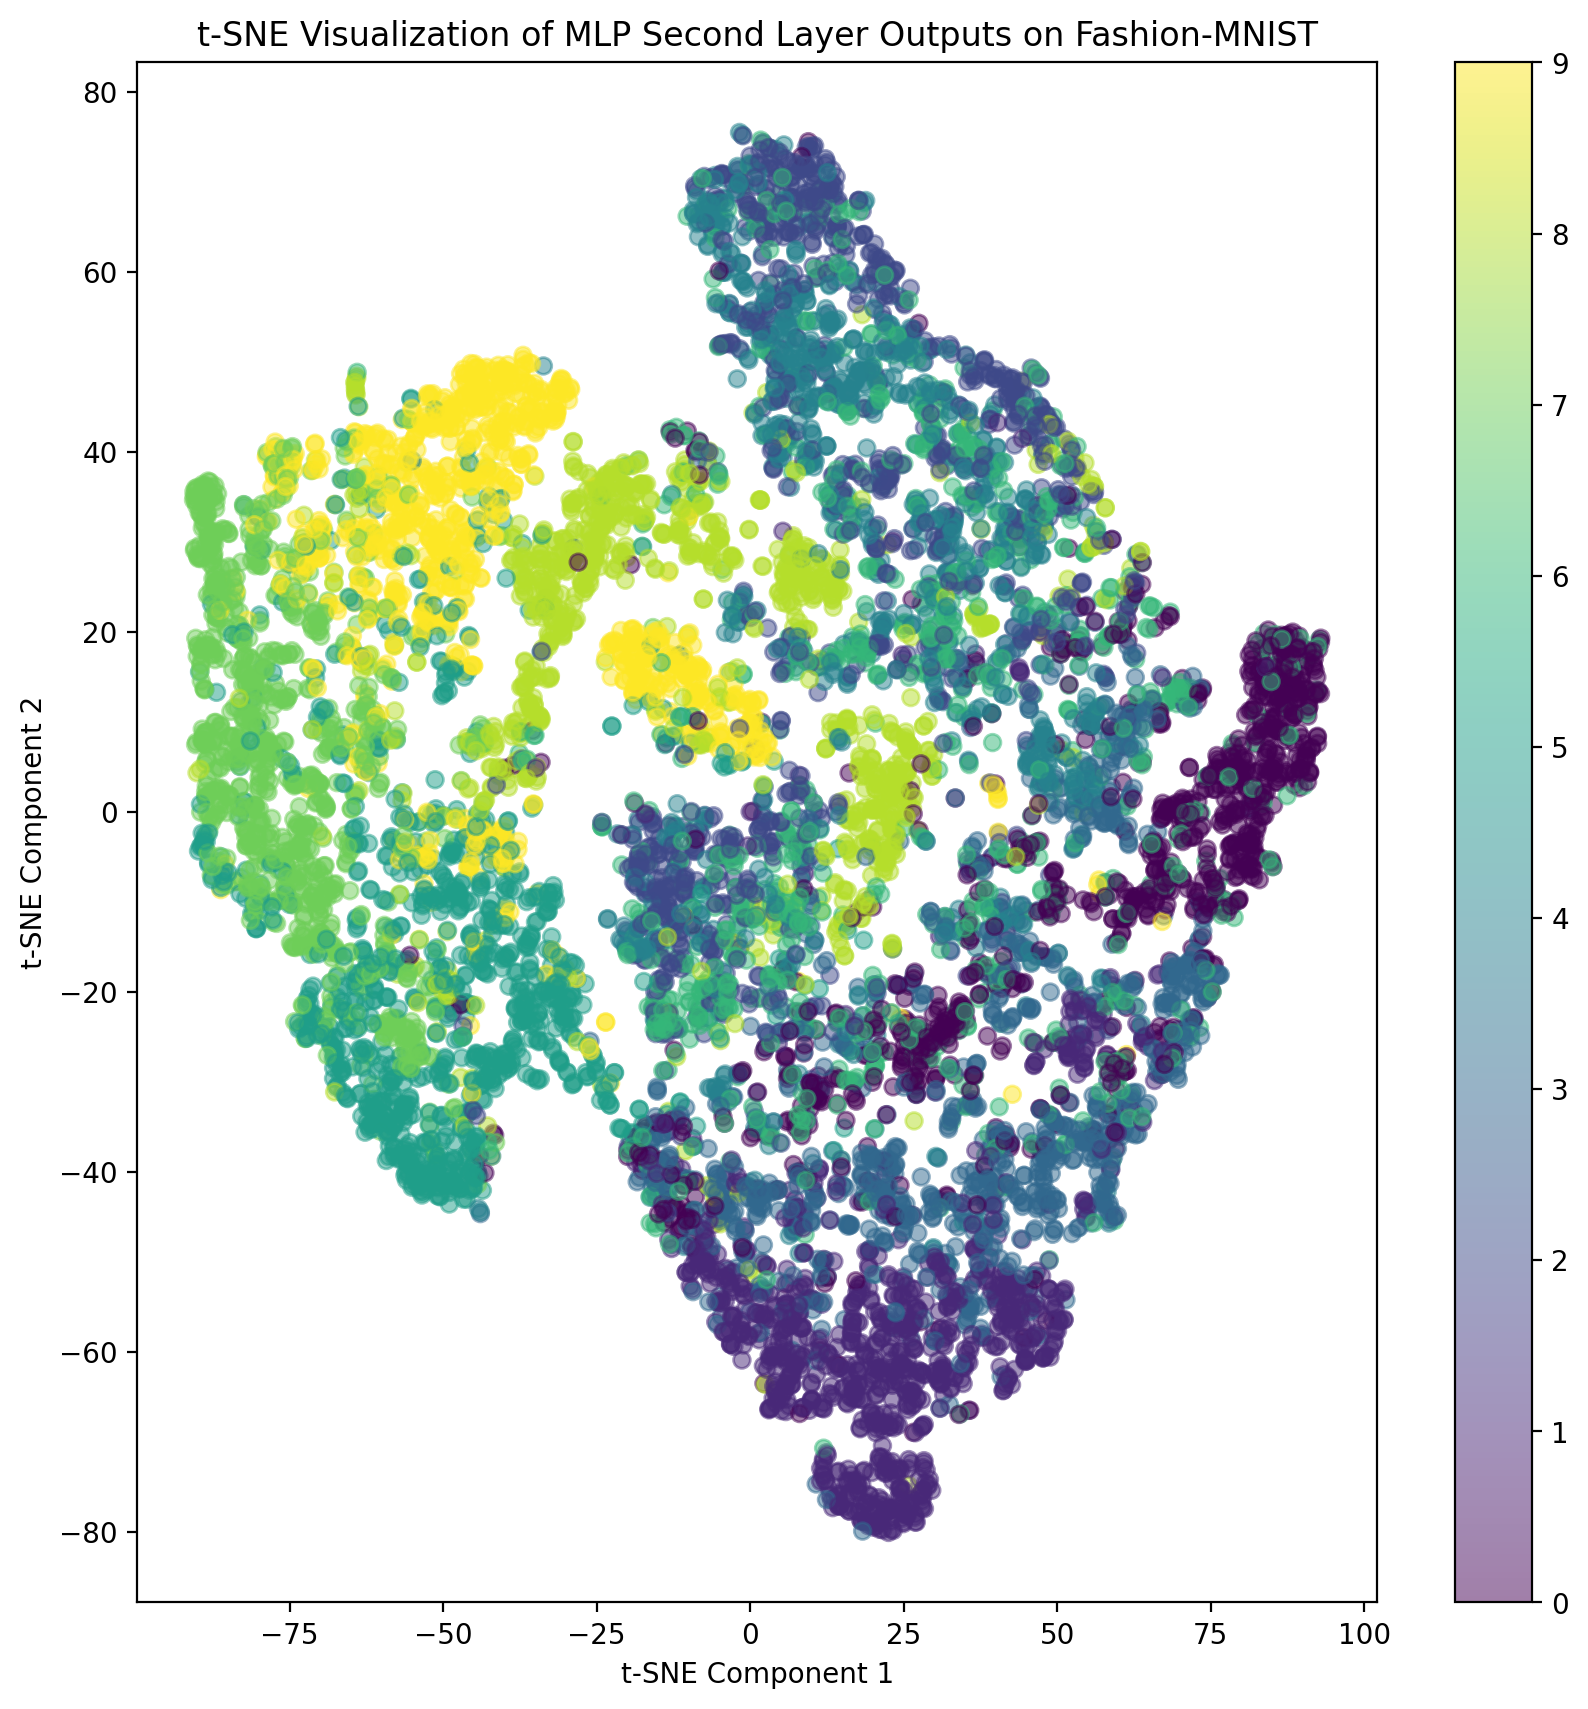

In [80]:
#creating a model to extract the output from the second hidden layer
fashion_intermediate_layer_model = Model(inputs=mlp_model.layers[0].input, outputs=mlp_model.layers[1].output)
fashion_layer_output = fashion_intermediate_layer_model.predict(X_fashion_test)

#applying t-SNE
fashion_tsne = TSNE(n_components=2, random_state=42)
fashion_tsne_output = fashion_tsne.fit_transform(fashion_layer_output)

#plotting the t-SNE results
plt.figure(figsize=(10, 10))
plt.scatter(fashion_tsne_output[:, 0], fashion_tsne_output[:, 1], c=y_fashion_test, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of MLP Second Layer Outputs on Fashion-MNIST")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

As seen above, the t-SNE results show poorly separated or highly overlapping vague clusters. This is due to the model being trained on digits of the MNIST dataset, which enables it to analyze the patters such as loops or strokes to identify the number, but the Fashion-MNIST dataset contains images of fashion items like shoes, shirts, etc. This shows the limitations of model generalization across different domains, since a model trained for one type of task (digits) cannot effectively perform on another type of task (fashion items) without additional training.<br>
While the MNIST trained model was not supposed to be used for Fashion-MNIST data, the vague clusters can still be observed. This is due to the pattern recognition of the model developed by numbers can be translated to the fashion items exhibiting patterns like pants having a pair of legs, which is similar to strokes of digits. Due to this, the model vaguely classifies the items according to the digits similarity.